In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [11]:
data = pd.read_csv("DatenMultiKollinearitaet.csv", index_col=False)

In [13]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
data.head(10)

,x1,x2,x3,x4,x5,x6,x7,y
0,1.906592,4.676716,-0.901372,-1.533843,1.049704,-2.638752,-1.818313,143.456185
1,5.603711,4.589726,0.082053,-14.721033,0.817282,-3.790761,-2.669819,92.680371
2,-3.038596,-1.957721,-1.261817,6.187289,-0.102112,-0.959557,-1.083226,33.370820
3,2.751508,7.832901,0.781620,0.921118,2.009560,1.584109,3.464494,179.518172
4,20.199166,3.347476,1.107269,3.205199,3.299243,3.104896,6.827676,456.684012
5,6.215789,4.140189,-1.263498,-4.093793,1.520023,-3.980836,-2.438071,162.203715
6,-2.516026,-1.584208,0.586257,-0.815325,-1.340152,0.127903,-1.734744,-52.749113
7,18.348706,-3.641395,-0.542515,0.830145,1.746068,-0.910860,0.970514,335.765466
8,-7.780387,1.531253,-0.961740,-2.104754,-0.978887,-2.715754,-4.208615,8.016515
9,7.863460,11.002105,-1.037304,2.809888,3.647113,-0.923657,1.739675,53.128186


### Correlation

In [15]:
data.corr()

,x1,x2,x3,x4,x5,x6,x7,y
x1,1.000000,0.130415,-0.023929,0.080358,0.677442,0.053169,0.380376,0.888806
x2,0.130415,1.000000,-0.096376,-0.120084,0.752146,-0.147836,0.235714,0.400434
x3,-0.023929,-0.096376,1.000000,0.187397,-0.108535,0.747166,0.624914,0.016519
x4,0.080358,-0.120084,0.187397,1.000000,-0.047306,0.773877,0.674843,0.167957
x5,0.677442,0.752146,-0.108535,-0.047306,1.000000,-0.091406,0.404546,0.775155
x6,0.053169,-0.147836,0.747166,0.773877,-0.091406,1.000000,0.861068,0.119870
x7,0.380376,0.235714,0.624914,0.674843,0.404546,0.861068,1.000000,0.495958
y,0.888806,0.400434,0.016519,0.167957,0.775155,0.119870,0.495958,1.000000


<Axes: >

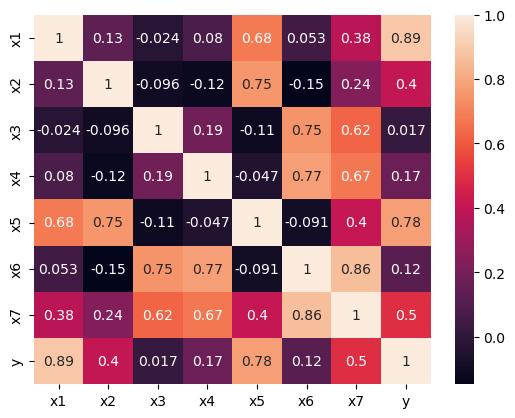

In [17]:
sns.heatmap(data.corr(), annot=True)

### Multicolinearity

In [22]:
cols = data.columns
for col in cols:
    columns = ['x1','x2', 'x3', 'x4', 'x5', 'x6','x7']
    columns.remove(col)
    X = data[columns]
    Y = data[col]
    X = sm.add_constant(X)
    mod = sm.OLS(Y,X).fit()
    print(mod.summary())
    

                            OLS Regression Results                            
Dep. Variable:                     x1   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     59.59
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           1.00e-29
Time:                        16:21:41   Log-Likelihood:                -294.93
No. Observations:                 100   AIC:                             603.9
Df Residuals:                      93   BIC:                             622.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2706      0.497     -0.545      0.5

ValueError: list.remove(x): x not in list